In [1]:
import os

import cv2
import matplotlib.pyplot as plt
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from ultralytics import YOLO

In [24]:
ANNOTATIONS_FOLDER = os.path.join('.', 'dataset', 'annotations')
IMAGES_FOLDER = os.path.join('.', 'dataset', 'images')
DATASET_ROOT_FOLDER = os.path.join('.', 'dataset')

DATASET_YOLO_ROOT_FOLDER = os.path.join('.', 'dataset_yolo')
DATASET_YOLO_IMAGES = os.path.join(DATASET_YOLO_ROOT_FOLDER, 'images')
DATASET_YOLO_IMAGES_TRAIN = os.path.join(DATASET_YOLO_IMAGES, 'train')
DATASET_YOLO_IMAGES_VAL = os.path.join(DATASET_YOLO_IMAGES, 'val')

DATASET_YOLO_LABELS = os.path.join(DATASET_YOLO_ROOT_FOLDER, 'labels')
DATASET_YOLO_LABELS_TRAIN = os.path.join(DATASET_YOLO_LABELS, 'train')
DATASET_YOLO_LABELS_VAL = os.path.join(DATASET_YOLO_LABELS, 'val')

OUTPUT_FOLDER = os.path.join('.', 'output')

In [3]:
import re

annotations_paths = sorted(
    [os.path.join(ANNOTATIONS_FOLDER, xml_name) for xml_name in os.listdir(ANNOTATIONS_FOLDER)], 
    key=lambda x: int(re.search(r'\d+', x).group())
)

In [4]:
import xml.etree.ElementTree as ET

parsed_annotations = []

for xml_path in annotations_paths:
    tree = ET.parse(xml_path)
    root = tree.getroot()
    
    filename = root.find('filename').text
    
    size_node = root.find('size')
    width = int(size_node.find('width').text)
    height = int(size_node.find('height').text)
    
    object_node = root.find('object')
    bnd_node = object_node.find('bndbox')
    
    ymin = int(bnd_node.find('ymin').text)
    xmin = int(bnd_node.find('xmin').text)
    ymax = int(bnd_node.find('ymax').text)
    xmax = int(bnd_node.find('xmax').text)
    
    annotation_data = {
        'image_name': filename,
        'width': width,
        'height': height,
        'ymin': ymin,
        'xmin': xmin,
        'ymax': ymax,
        'xmax': xmax
    }
    
    parsed_annotations.append(annotation_data)
    
df = pd.DataFrame(parsed_annotations)

In [5]:
import sys
import logging

logger = logging.getLogger("VGG16-training")

if logger.hasHandlers():
    logger.handlers.clear()
    
logger.setLevel(logging.INFO)

handler = logging.StreamHandler(sys.stdout)
formatter = logging.Formatter(
    '%(asctime)s %(levelname)-5s %(name)s - %(message)s',
)
handler.setFormatter(formatter)

logger.addHandler(handler)

(-0.5, 441.5, 332.5, -0.5)

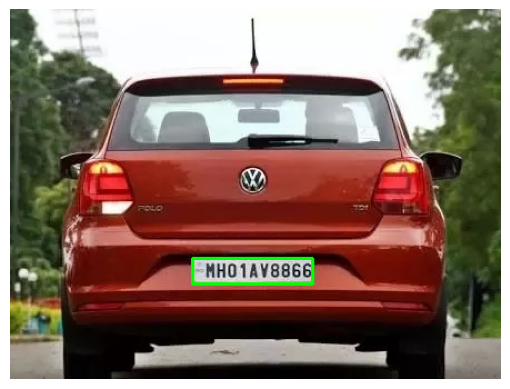

In [6]:
sample_image_row = df.iloc[9]

sample_image = cv2.imread(os.path.join(IMAGES_FOLDER, sample_image_row['image_name']))
sample_image_rgb = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

ymin = sample_image_row['ymin']
xmin = sample_image_row['xmin']
ymax = sample_image_row['ymax']
xmax = sample_image_row['xmax']

cv2.rectangle(sample_image_rgb, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

plt.imshow(sample_image_rgb)
plt.axis('off')

In [7]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train, test_size=0.1, random_state=24)

In [8]:
print(f'df train length: {df_train.shape[0]}')
print(f'df val length: {df_val.shape[0]}')
print(f'df test length: {df_test.shape[0]}')

df train length: 311
df val length: 35
df test length: 87


In [9]:
df_test.head(10)

,image_name,width,height,ymin,xmin,ymax,xmax
425,Cars425.png,500,232,103,211,132,301
75,Cars75.png,400,248,196,209,201,218
181,Cars181.png,225,400,195,69,209,128
30,Cars30.png,400,240,169,155,182,200
364,Cars364.png,400,242,140,61,167,115
408,Cars408.png,400,267,217,160,228,187
253,Cars253.png,400,210,124,25,137,64
155,Cars155.png,400,267,177,150,190,203
168,Cars168.png,400,225,95,82,125,137
415,Cars415.png,400,300,157,133,192,261


In [10]:
df_val

,image_name,width,height,ymin,xmin,ymax,xmax
260,Cars260.png,400,240,112,170,129,232
91,Cars91.png,400,253,170,269,189,317
4,Cars4.png,590,350,82,156,253,503
67,Cars67.png,553,275,223,189,248,328
172,Cars172.png,457,422,209,173,239,301
58,Cars58.png,400,247,166,154,187,241
221,Cars221.png,400,225,122,102,135,125
304,Cars304.png,400,226,114,143,156,222
322,Cars322.png,400,354,257,274,297,350
74,Cars74.png,400,267,115,115,153,277


In [11]:
def mkdir_yolo_dataset_folder(root_folder=DATASET_YOLO_ROOT_FOLDER):
    images_folder = os.path.join(root_folder, 'images')
    labels_folder = os.path.join(root_folder, 'labels')
    
    train_images_folder = os.path.join(images_folder, 'train')
    val_images_folder = os.path.join(images_folder, 'val')
    
    train_labels_folder = os.path.join(labels_folder, 'train')
    val_labels_folder = os.path.join(labels_folder, 'val')

    os.makedirs(root_folder, exist_ok=True)
    
    os.makedirs(images_folder, exist_ok=True)
    os.makedirs(labels_folder, exist_ok=True)
    
    os.makedirs(train_images_folder, exist_ok=True)
    os.makedirs(val_images_folder, exist_ok=True)
    
    os.makedirs(train_labels_folder, exist_ok=True)
    os.makedirs(val_labels_folder, exist_ok=True)

In [12]:
mkdir_yolo_dataset_folder()

In [13]:
import shutil

def init_yolo_images_folder(df, src_folder, dest_folder):
    for image_name in df['image_name']:
        src_path = os.path.join(src_folder, image_name)
        dest_path = os.path.join(dest_folder, image_name)
        
        if os.path.exists(dest_path):
            continue
            
        shutil.copy2(src_path, dest_path)

In [14]:
init_yolo_images_folder(df_train, IMAGES_FOLDER, DATASET_YOLO_IMAGES_TRAIN)
init_yolo_images_folder(df_val, IMAGES_FOLDER, DATASET_YOLO_IMAGES_VAL)

In [15]:
def init_yolo_labels_folder(df, dest_folder):
    for _, row in df.iterrows():
        width = row['width']
        height = row['height']
        
        relative_x_center = (row['xmin'] + row['xmax']) / (2 * width)
        relative_y_center = (row['ymin'] + row['ymax']) / (2 * height)
        
        relative_width = (row['xmax'] - row['xmin']) / width
        relative_height = (row['ymax'] - row['ymin']) / height
        
        label_path = os.path.join(dest_folder, row['image_name'].split('.')[0]) + '.txt'
        
        with open(label_path, 'w') as f:
            line = f'{0} {relative_x_center} {relative_y_center} {relative_width} {relative_height}'
            f.write(line)

In [16]:
init_yolo_labels_folder(df_train, DATASET_YOLO_LABELS_TRAIN)
init_yolo_labels_folder(df_val, DATASET_YOLO_LABELS_VAL)

In [17]:
YOLO_DATASET_CONFIGURATION_NAME = 'yolo_dataset.yml'
YOLO_DATASET_CONFIGURATION = {
    'path': DATASET_YOLO_ROOT_FOLDER,
    'train': os.path.join('.', 'images', 'train'),
    'val': os.path.join('.', 'images', 'val'),
    'nc': 1,
    'names': ['car_license_plate']
}

YOLO_DATASET_PATH_TO_CONFIGURATION = os.path.join(DATASET_YOLO_ROOT_FOLDER, YOLO_DATASET_CONFIGURATION_NAME)

In [18]:
import yaml

with open(YOLO_DATASET_PATH_TO_CONFIGURATION, 'w') as f:
    yaml.dump(YOLO_DATASET_CONFIGURATION, f)

In [19]:
print(f'Is CUDA available: {torch.cuda.is_available()}')

Is CUDA available: True


In [20]:
model = YOLO("yolov8n.pt")

In [21]:
n_epochs = 1
batch_size = 32

In [23]:
torch.cuda.reset_peak_memory_stats()

model.train(
    data=YOLO_DATASET_PATH_TO_CONFIGURATION,
    epochs=n_epochs,
    batch=batch_size,
    device=[0]
)

Ultralytics 8.3.128  Python-3.10.7 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=.\dataset_yolo\yolo_dataset.yml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True

train: Scanning C:\Data\University\master\master_1_year_sem_2\neurocomputing\neurocomputing-lab\dataset_yolo\labels\train... 311 images, 0 backgrounds, 0 corrupt: 100%|██████████| 311/311 [00:00<00:00, 559.61it/s]


train: New cache created: C:\Data\University\master\master_1_year_sem_2\neurocomputing\neurocomputing-lab\dataset_yolo\labels\train.cache
val: Fast image access  (ping: 0.20.1 ms, read: 23.410.8 MB/s, size: 504.6 KB)


val: Scanning C:\Data\University\master\master_1_year_sem_2\neurocomputing\neurocomputing-lab\dataset_yolo\labels\val... 35 images, 0 backgrounds, 0 corrupt: 100%|██████████| 35/35 [00:00<00:00, 323.10it/s]

val: New cache created: C:\Data\University\master\master_1_year_sem_2\neurocomputing\neurocomputing-lab\dataset_yolo\labels\val.cache


Plotting labels to C:\Data\University\master\master_1_year_sem_2\neurocomputing\runs\detect\train8\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to C:\Data\University\master\master_1_year_sem_2\neurocomputing\runs\detect\train8
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      3.64G      1.605      3.973      1.507         44        640: 100%|██████████| 10/10 [00:29<00:00,  2.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.90s/it]


                   all         35         35    0.00286      0.857      0.289      0.169

1 epochs completed in 0.009 hours.
Optimizer stripped from C:\Data\University\master\master_1_year_sem_2\neurocomputing\runs\detect\train8\weights\last.pt, 6.2MB
Optimizer stripped from C:\Data\University\master\master_1_year_sem_2\neurocomputing\runs\detect\train8\weights\best.pt, 6.2MB

Validating C:\Data\University\master\master_1_year_sem_2\neurocomputing\runs\detect\train8\weights\best.pt...
Ultralytics 8.3.128  Python-3.10.7 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]


                   all         35         35    0.00286      0.857      0.288      0.167
Speed: 1.7ms preprocess, 7.0ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to C:\Data\University\master\master_1_year_sem_2\neurocomputing\runs\detect\train8


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000017FB9724370>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [25]:
model.save(os.path.join(OUTPUT_FOLDER, 'model_yolo.pt'))